<a href="https://colab.research.google.com/github/jangirsachin9619-cpu/ml4/blob/main/ml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Global_Pollution_Analysis.csv'
data=pd.read_csv(path)
data.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [4]:
data.isnull().sum()

,0
Country,0
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0


In [5]:
navalues = data.fillna(data.mean(numeric_only=True))

In [6]:
numeric_data = data.select_dtypes(include=np.number)
print("Numeric columns identified:")
for col in numeric_data.columns:
    print(col)

Numeric columns identified:
Year
Air_Pollution_Index
Water_Pollution_Index
Soil_Pollution_Index
Industrial_Waste (in tons)
Energy_Recovered (in GWh)
CO2_Emissions (in MT)
Renewable_Energy (%)
Plastic_Waste_Produced (in tons)
Energy_Consumption_Per_Capita (in MWh)
Population (in millions)
GDP_Per_Capita (in USD)


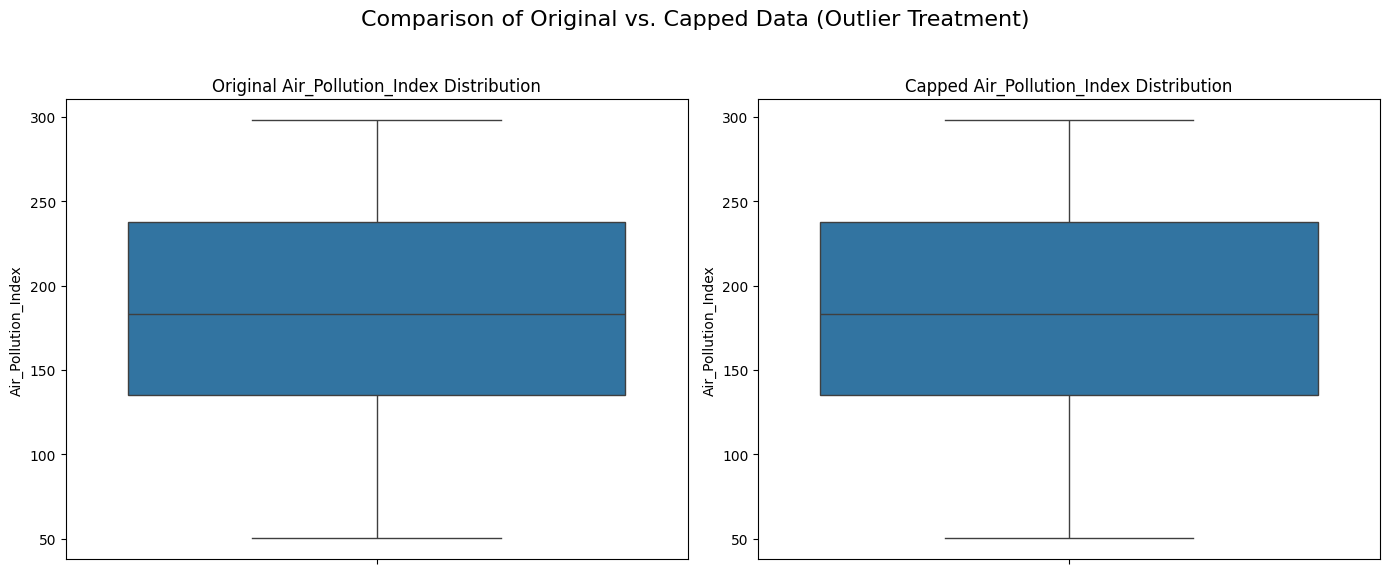

Comparative box plots showing original and capped data for 'Air_Pollution_Index' have been generated.


In [11]:
column_to_plot = 'Air_Pollution_Index'

plt.figure(figsize=(14, 6))

# Box plot for original data
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.boxplot(y=numeric_data[column_to_plot])
plt.title(f'Original {column_to_plot} Distribution')
plt.ylabel(column_to_plot)

# Box plot for capped data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.boxplot(y=data_capped[column_to_plot])
plt.title(f'Capped {column_to_plot} Distribution')
plt.ylabel(column_to_plot)

plt.suptitle('Comparison of Original vs. Capped Data (Outlier Treatment)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
print("Comparative box plots showing original and capped data for 'Air_Pollution_Index' have been generated.")

In [9]:
data_capped = numeric_data.copy()

for column in data_capped.columns:
    Q1 = data_capped[column].quantile(0.25)
    Q3 = data_capped[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_capped[column] = np.clip(data_capped[column], lower_bound, upper_bound)

print("Outliers have been detected and capped in 'data_capped'.")

Outliers have been detected and capped in 'data_capped'.


In [10]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_capped[columns_to_scale])
print(f"Columns {columns_to_scale} have been scaled using StandardScaler. The output is a NumPy array 'scaled_data'.")
print(scaled_data[:5])

Columns ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)'] have been scaled using StandardScaler. The output is a NumPy array 'scaled_data'.
[[-1.3563248   1.54332802]
 [-1.28427604  0.12491513]
 [ 1.71891017  0.12388775]
 [-1.10623247  0.80913129]
 [-0.68918101  0.88268058]]


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be scaled
columns_to_scale = ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']

# Apply MinMaxScaler to the selected columns in data_capped
data_capped[columns_to_scale] = scaler.fit_transform(data_capped[columns_to_scale])

print("Columns 'CO2_Emissions (in MT)' and 'Industrial_Waste (in tons)' in data_capped have been scaled using MinMaxScaler.")
print(data_capped[columns_to_scale].head())

Columns 'CO2_Emissions (in MT)' and 'Industrial_Waste (in tons)' in data_capped have been scaled using MinMaxScaler.
   CO2_Emissions (in MT)  Industrial_Waste (in tons)
0               0.070756                    0.949995
1               0.092527                    0.559811
2               1.000000                    0.559529
3               0.146326                    0.748028
4               0.272347                    0.768261


In [13]:
from sklearn.preprocessing import LabelEncoder

# Add 'Country' column from original 'data' DataFrame to 'data_capped'
# Ensure the indices align if data_capped was re-indexed or filtered
data_capped['Country'] = data['Country']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Country' column
data_capped['Country_Encoded'] = label_encoder.fit_transform(data_capped['Country'])

print("'Country' column added to data_capped and 'Country_Encoded' created using LabelEncoder.")
print(data_capped[['Country', 'Country_Encoded']].head())
print(f"Number of unique countries: {len(label_encoder.classes_)}")

'Country' column added to data_capped and 'Country_Encoded' created using LabelEncoder.
        Country  Country_Encoded
0       Hungary               77
1     Singapore              147
2       Romania              136
3  Cook Islands               38
4      Djibouti               46
Number of unique countries: 175


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Identify numerical columns in data_capped that have not been explicitly scaled yet
# and are not the 'Country' or 'Country_Encoded' columns.
numerical_cols_to_scale = [
    'Year',
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Energy_Recovered (in GWh)',
    'Renewable_Energy (%)',
    'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)'
]

# Apply MinMaxScaler to these selected numerical columns in data_capped
data_capped[numerical_cols_to_scale] = scaler.fit_transform(data_capped[numerical_cols_to_scale])

print("Remaining numerical columns in data_capped have been scaled using MinMaxScaler.")
print(data_capped[numerical_cols_to_scale].head())

Remaining numerical columns in data_capped have been scaled using MinMaxScaler.
       Year  Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
0  0.263158             0.898042               0.553778              0.295481   
1  0.052632             0.147062               0.173673              0.768178   
2  0.842105             0.166727               0.310542              0.800768   
3  0.947368             0.929982               0.214222              0.596973   
4  0.421053             0.520331               0.573161              0.799537   

   Energy_Recovered (in GWh)  Renewable_Energy (%)  \
0                   0.299867              0.810198   
1                   0.996027              0.705301   
2                   0.978556              0.097484   
3                   0.273323              0.312893   
4                   0.058679              0.650494   

   Plastic_Waste_Produced (in tons)  Energy_Consumption_Per_Capita (in MWh)  \
0                          0.

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_capped['Year'] = label_encoder.fit_transform(data_capped['Year'])
print("The 'Year' column in data_capped has been encoded using LabelEncoder.")
print(data_capped['Year'].head())

The 'Year' column in data_capped has been encoded using LabelEncoder.
0     5
1     1
2    16
3    18
4     8
Name: Year, dtype: int64


In [16]:
data_capped['Total_Pollution_Index'] = data_capped['Air_Pollution_Index'] + data_capped['Water_Pollution_Index'] + data_capped['Soil_Pollution_Index']
print("'Total_Pollution_Index' column created in data_capped by summing 'Air_Pollution_Index', 'Water_Pollution_Index', and 'Soil_Pollution_Index'.")
print(data_capped[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Total_Pollution_Index']].head())

'Total_Pollution_Index' column created in data_capped by summing 'Air_Pollution_Index', 'Water_Pollution_Index', and 'Soil_Pollution_Index'.
   Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
0             0.898042               0.553778              0.295481   
1             0.147062               0.173673              0.768178   
2             0.166727               0.310542              0.800768   
3             0.929982               0.214222              0.596973   
4             0.520331               0.573161              0.799537   

   Total_Pollution_Index  
0               1.747301  
1               1.088913  
2               1.278037  
3               1.741177  
4               1.893029  


In [ ]:
average_pollution_per_year = data_capped.groupby('Year')['Total_Pollution_Index'].mean().reset_index()
print("Average 'Total_Pollution_Index' calculated for each encoded 'Year'.")
print(average_pollution_per_year.head())

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total_Pollution_Index', data=average_pollution_per_year)
plt.title('Average Total Pollution Index Over Encoded Years')
plt.xlabel('Encoded Year')
plt.ylabel('Average Total Pollution Index')
plt.grid(True)
plt.show()
print("Line plot showing average 'Total_Pollution_Index' over encoded years has been generated.")

NameError: name 'average_pollution_per_year' is not defined

<Figure size 1200x600 with 0 Axes>

In [18]:
lower_bound = data_capped['Total_Pollution_Index'].quantile(0.33)
upper_bound = data_capped['Total_Pollution_Index'].quantile(0.66)

print(f"33rd percentile (Lower bound for Medium severity): {lower_bound:.2f}")
print(f"66th percentile (Upper bound for Medium severity): {upper_bound:.2f}")

33rd percentile (Lower bound for Medium severity): 1.28
66th percentile (Upper bound for Medium severity): 1.72


In [19]:
bins = [0, lower_bound, upper_bound, data_capped['Total_Pollution_Index'].max()]
labels = ['Low', 'Medium', 'High']
data_capped['Pollution_Severity'] = pd.cut(data_capped['Total_Pollution_Index'], bins=bins, labels=labels, include_lowest=True)
print("New 'Pollution_Severity' column created and categorized.")
print("Value counts for 'Pollution_Severity':")
print(data_capped['Pollution_Severity'].value_counts())

New 'Pollution_Severity' column created and categorized.
Value counts for 'Pollution_Severity':
Pollution_Severity
High      68
Low       66
Medium    66
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
X = data_capped.drop(['Country', 'Country_Encoded', 'Total_Pollution_Index', 'Pollution_Severity'], axis=1)
y = data_capped['Pollution_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Feature matrix X and target vector y defined.")
print("Data split into X_train, X_test, y_train, y_test.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Feature matrix X and target vector y defined.
Data split into X_train, X_test, y_train, y_test.
X_train shape: (160, 12)
X_test shape: (40, 12)
y_train shape: (160,)
y_test shape: (40,)


In [21]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier using the training data
mnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mnb.predict(X_test)

print("Multinomial Naive Bayes classifier initialized, trained, and predictions made.")
print("First 5 predictions:")
print(y_pred[:5])

Multinomial Naive Bayes classifier initialized, trained, and predictions made.
First 5 predictions:
['High' 'Low' 'Low' 'High' 'High']


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}\n")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)
print("\n")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(class_report)

Accuracy Score: 0.35

Confusion Matrix:

[[ 6  5  0]
 [ 5  7  0]
 [12  4  1]]


Classification Report:

              precision    recall  f1-score   support

        High       0.26      0.55      0.35        11
         Low       0.44      0.58      0.50        12
      Medium       1.00      0.06      0.11        17

    accuracy                           0.35        40
   macro avg       0.57      0.40      0.32        40
weighted avg       0.63      0.35      0.29        40



In [23]:
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
}

print("KNN parameter grid 'knn_param_grid' defined:")
print(knn_param_grid)

KNN parameter grid 'knn_param_grid' defined:
{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation score for KNN:", grid_search_knn.best_score_)

Best parameters for KNN: {'n_neighbors': 7}
Best cross-validation score for KNN: 0.5


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get the best KNN estimator from GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test data using the best model
y_pred_knn = best_knn_model.predict(X_test)

# Calculate accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy Score (best estimator): {accuracy_knn:.2f}\n")

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix (best estimator):\n")
print(conf_matrix_knn)
print("\n")

# Generate classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report (best estimator):\n")
print(class_report_knn)

KNN Accuracy Score (best estimator): 0.55

KNN Confusion Matrix (best estimator):

[[7 3 1]
 [1 8 3]
 [6 4 7]]


KNN Classification Report (best estimator):

              precision    recall  f1-score   support

        High       0.50      0.64      0.56        11
         Low       0.53      0.67      0.59        12
      Medium       0.64      0.41      0.50        17

    accuracy                           0.55        40
   macro avg       0.56      0.57      0.55        40
weighted avg       0.57      0.55      0.54        40



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)
y_pred_dt_baseline = dt_classifier.predict(X_test)
print("Decision Tree Classifier initialized, trained, and predictions made.")
print("First 5 predictions:")
print(y_pred_dt_baseline[:5])

Decision Tree Classifier initialized, trained, and predictions made.
First 5 predictions:
['Medium' 'Medium' 'High' 'High' 'Medium']


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_dt_baseline = accuracy_score(y_test, y_pred_dt_baseline)
print(f"Decision Tree Baseline Accuracy Score: {accuracy_dt_baseline:.2f}\n")
# confusion matrix
conf_matrix_dt_baseline = confusion_matrix(y_test, y_pred_dt_baseline)
print("Decision Tree Baseline Confusion Matrix:\n")
print(conf_matrix_dt_baseline)
print("\n")
# classification report
class_report_dt_baseline = classification_report(y_test, y_pred_dt_baseline)
print("Decision Tree Baseline Classification Report:\n")
print(class_report_dt_baseline)

Decision Tree Baseline Accuracy Score: 0.68

Decision Tree Baseline Confusion Matrix:

[[ 8  1  2]
 [ 1 10  1]
 [ 3  5  9]]


Decision Tree Baseline Classification Report:

              precision    recall  f1-score   support

        High       0.67      0.73      0.70        11
         Low       0.62      0.83      0.71        12
      Medium       0.75      0.53      0.62        17

    accuracy                           0.68        40
   macro avg       0.68      0.70      0.68        40
weighted avg       0.69      0.68      0.67        40



In [28]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

print("Decision Tree parameter grid 'dt_param_grid' defined:")
print(dt_param_grid)

Decision Tree parameter grid 'dt_param_grid' defined:
{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt_classifier_grid = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_classifier_grid, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.7375


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
best_dt_model = grid_search_dt.best_estimator_

y_pred_dt_tuned = best_dt_model.predict(X_test)
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
print(f"Decision Tree Tuned Accuracy Score: {accuracy_dt_tuned:.2f}\n")
conf_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
print("Decision Tree Tuned Confusion Matrix:\n")
print(conf_matrix_dt_tuned)
print("\n")
class_report_dt_tuned = classification_report(y_test, y_pred_dt_tuned)
print("Decision Tree Tuned Classification Report:\n")
print(class_report_dt_tuned)

Decision Tree Tuned Accuracy Score: 0.70

Decision Tree Tuned Confusion Matrix:

[[10  0  1]
 [ 1 10  1]
 [ 5  4  8]]


Decision Tree Tuned Classification Report:

              precision    recall  f1-score   support

        High       0.62      0.91      0.74        11
         Low       0.71      0.83      0.77        12
      Medium       0.80      0.47      0.59        17

    accuracy                           0.70        40
   macro avg       0.71      0.74      0.70        40
weighted avg       0.73      0.70      0.69        40



In [31]:
print("Multinomial Naive Bayes Classifier Performance:\n")
print(f"Accuracy Score: {accuracy:.2f}\n")
print("Confusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Multinomial Naive Bayes Classifier Performance:

Accuracy Score: 0.35

Confusion Matrix:

[[ 6  5  0]
 [ 5  7  0]
 [12  4  1]]

Classification Report:

              precision    recall  f1-score   support

        High       0.26      0.55      0.35        11
         Low       0.44      0.58      0.50        12
      Medium       1.00      0.06      0.11        17

    accuracy                           0.35        40
   macro avg       0.57      0.40      0.32        40
weighted avg       0.63      0.35      0.29        40



In [32]:
print("K-Nearest Neighbors Classifier (Tuned) Performance:\n")
print(f"Accuracy Score: {accuracy_knn:.2f}\n")
print("Confusion Matrix:\n")
print(conf_matrix_knn)
print("\nClassification Report:\n")
print(class_report_knn)

K-Nearest Neighbors Classifier (Tuned) Performance:

Accuracy Score: 0.55

Confusion Matrix:

[[7 3 1]
 [1 8 3]
 [6 4 7]]

Classification Report:

              precision    recall  f1-score   support

        High       0.50      0.64      0.56        11
         Low       0.53      0.67      0.59        12
      Medium       0.64      0.41      0.50        17

    accuracy                           0.55        40
   macro avg       0.56      0.57      0.55        40
weighted avg       0.57      0.55      0.54        40



In [33]:
print("Decision Tree Classifier (Tuned) Performance:\n")
print(f"Accuracy Score: {accuracy_dt_tuned:.2f}\n")
print("Confusion Matrix:\n")
print(conf_matrix_dt_tuned)
print("\nClassification Report:\n")
print(class_report_dt_tuned)

Decision Tree Classifier (Tuned) Performance:

Accuracy Score: 0.70

Confusion Matrix:

[[10  0  1]
 [ 1 10  1]
 [ 5  4  8]]

Classification Report:

              precision    recall  f1-score   support

        High       0.62      0.91      0.74        11
         Low       0.71      0.83      0.77        12
      Medium       0.80      0.47      0.59        17

    accuracy                           0.70        40
   macro avg       0.71      0.74      0.70        40
weighted avg       0.73      0.70      0.69        40



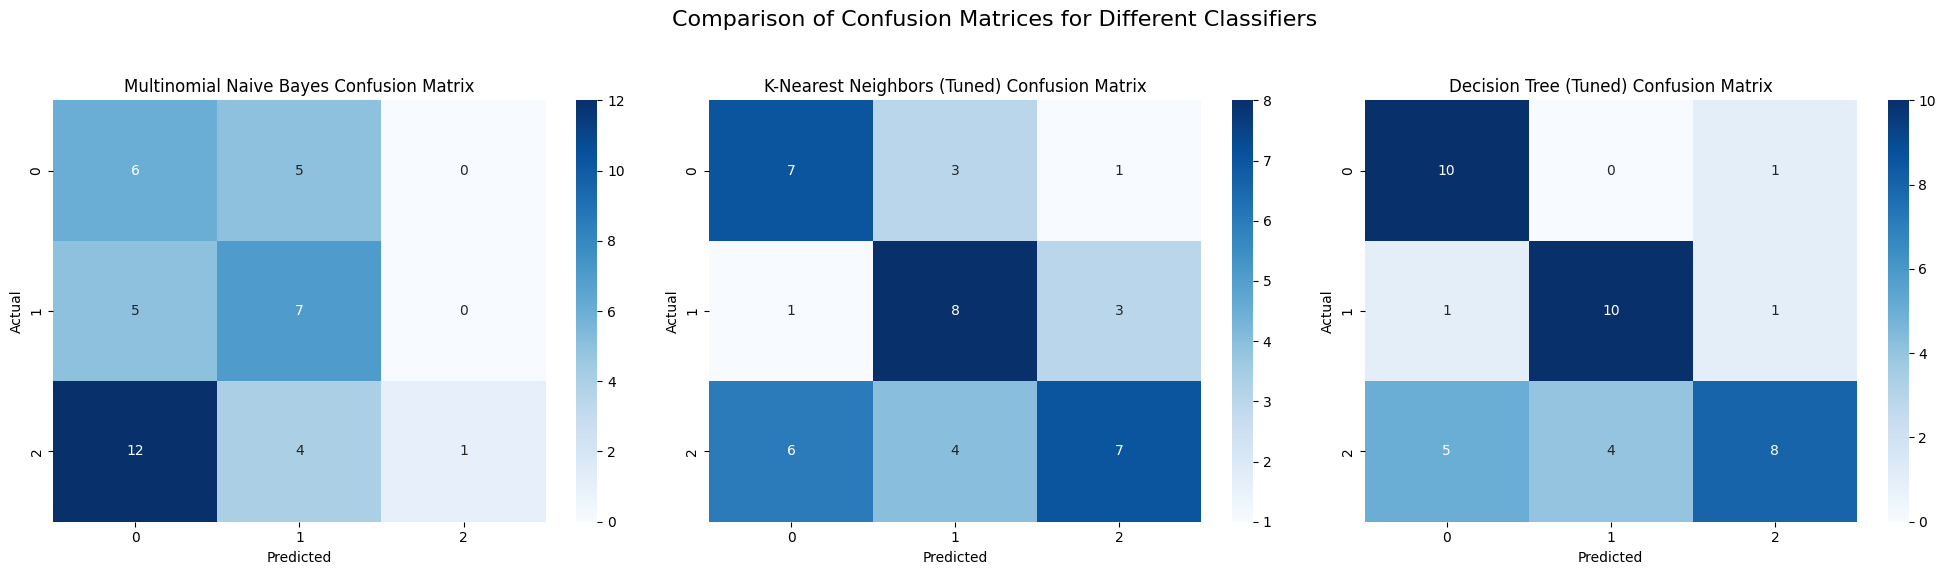

Single figure with subplots for confusion matrices of Multinomial Naive Bayes, K-Nearest Neighbors (Tuned), and Decision Tree (Tuned) classifiers generated.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 2. Plot for Multinomial Naive Bayes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Multinomial Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 3. Plot for K-Nearest Neighbors Tuned
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('K-Nearest Neighbors (Tuned) Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# 4. Plot for Decision Tree Tuned
sns.heatmap(conf_matrix_dt_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Decision Tree (Tuned) Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# 5. Add a main title for the entire figure
fig.suptitle('Comparison of Confusion Matrices for Different Classifiers', fontsize=16)

# 6. Adjust the layout of the subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to prevent suptitle overlap

# 7. Display the figure
plt.show()
print("Single figure with subplots for confusion matrices of Multinomial Naive Bayes, K-Nearest Neighbors (Tuned), and Decision Tree (Tuned) classifiers generated.")

In [35]:
pollution_energy_summary = data_capped.groupby('Pollution_Severity')[['Total_Pollution_Index', 'Energy_Recovered (in GWh)']].mean()
print("Average 'Total_Pollution_Index' and 'Energy_Recovered (in GWh)' by 'Pollution_Severity':")
print(pollution_energy_summary)

Average 'Total_Pollution_Index' and 'Energy_Recovered (in GWh)' by 'Pollution_Severity':
                    Total_Pollution_Index  Energy_Recovered (in GWh)
Pollution_Severity                                                  
Low                              0.951464                   0.512135
Medium                           1.519608                   0.518754
High                             2.009005                   0.497691


/tmp/ipython-input-3405524522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollution_energy_summary = data_capped.groupby('Pollution_Severity')[['Total_Pollution_Index', 'Energy_Recovered (in GWh)']].mean()


In [36]:
pollution_energy_summary = data_capped.groupby('Pollution_Severity', observed=False)[['Total_Pollution_Index', 'Energy_Recovered (in GWh)']].mean()
print("Average 'Total_Pollution_Index' and 'Energy_Recovered (in GWh)' by 'Pollution_Severity':")
print(pollution_energy_summary)

Average 'Total_Pollution_Index' and 'Energy_Recovered (in GWh)' by 'Pollution_Severity':
                    Total_Pollution_Index  Energy_Recovered (in GWh)
Pollution_Severity                                                  
Low                              0.951464                   0.512135
Medium                           1.519608                   0.518754
High                             2.009005                   0.497691


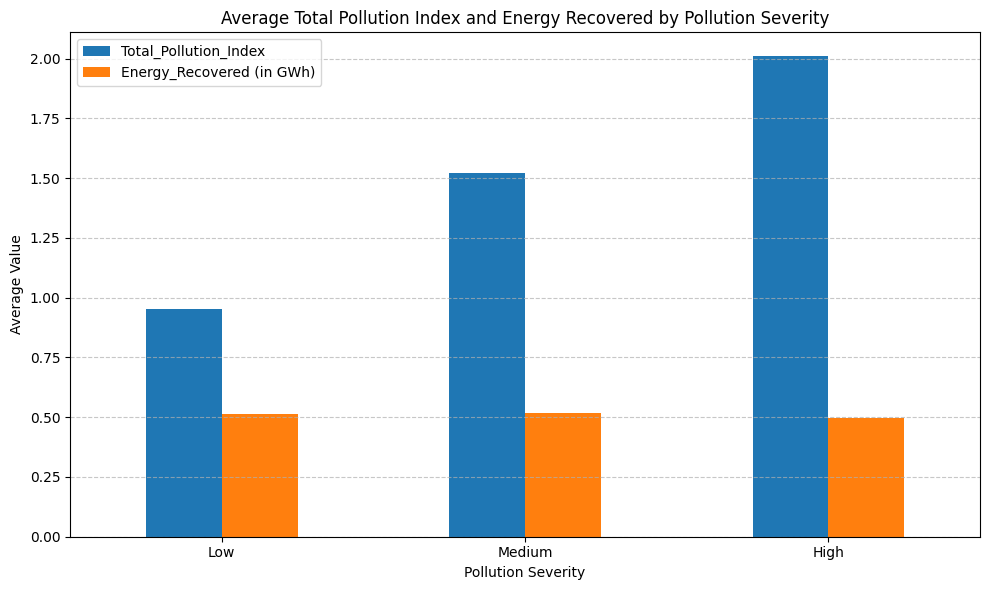

Bar plot showing average 'Total_Pollution_Index' and 'Energy_Recovered (in GWh)' by 'Pollution_Severity' generated.


In [37]:
pollution_energy_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Total Pollution Index and Energy Recovered by Pollution Severity')
plt.xlabel('Pollution Severity')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Bar plot showing average 'Total_Pollution_Index' and 'Energy_Recovered (in GWh)' by 'Pollution_Severity' generated.")

In [38]:
feature_importances = best_dt_model.feature_importances_
feature_names = X_train.columns

# Create a Pandas Series for better visualization and sorting
importance_df = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_importance = importance_df.sort_values(ascending=False)

print("Feature Importances from Tuned Decision Tree Model (Descending Order):")
print(sorted_importance)

Feature Importances from Tuned Decision Tree Model (Descending Order):
Air_Pollution_Index                       0.268359
Soil_Pollution_Index                      0.264933
Water_Pollution_Index                     0.205564
Population (in millions)                  0.089366
CO2_Emissions (in MT)                     0.056048
Energy_Recovered (in GWh)                 0.036663
Renewable_Energy (%)                      0.029831
Year                                      0.019177
Plastic_Waste_Produced (in tons)          0.019177
Energy_Consumption_Per_Capita (in MWh)    0.010882
Industrial_Waste (in tons)                0.000000
GDP_Per_Capita (in USD)                   0.000000
dtype: float64
